In [ ]:
# Import standard libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Move up one level to data, then access raw
file_path = '../data/raw/retail_sales_dataset.csv'

# Load the CSV file
retail_data = pd.read_csv(file_path)

# Display the first few rows of the data
print(retail_data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [3]:
# Convert 'date' to datetime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

In [4]:
# Extract date features (month, day of the week, etc.)
retail_data['month'] = retail_data['Date'].dt.month
retail_data['day_of_week'] = retail_data['Date'].dt.dayofweek
retail_data['year'] = retail_data['Date'].dt.year

print(retail_data.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  month  day_of_week  year  
0         3              50           150     11            4  2023  
1         2             500          1000      2            0  2023  
2         1              30            30      1            4  2023  
3         1             500           500      5            6  2023  
4         2              50           100      5            5  2023  


In [9]:
# Group by month to get total sales per month
retail_data_monthly_sales = retail_data.groupby(['year', 'month'])['Total Amount'].sum().reset_index()

# Sort by 'total amount' in descending order
retail_data_monthly_sales = retail_data_monthly_sales.sort_values(by='Total Amount', ascending=False)

# Reset the index for better readability
retail_data_monthly_sales.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(retail_data_monthly_sales)

    year  month  Total Amount
0   2023      5         53150
1   2023     10         46580
2   2023     12         44690
3   2023      2         44060
4   2023      8         36960
5   2023      6         36715
6   2023      7         35465
7   2023      1         35450
8   2023     11         34920
9   2023      4         33870
10  2023      3         28990
11  2023      9         23620
12  2024      1          1530


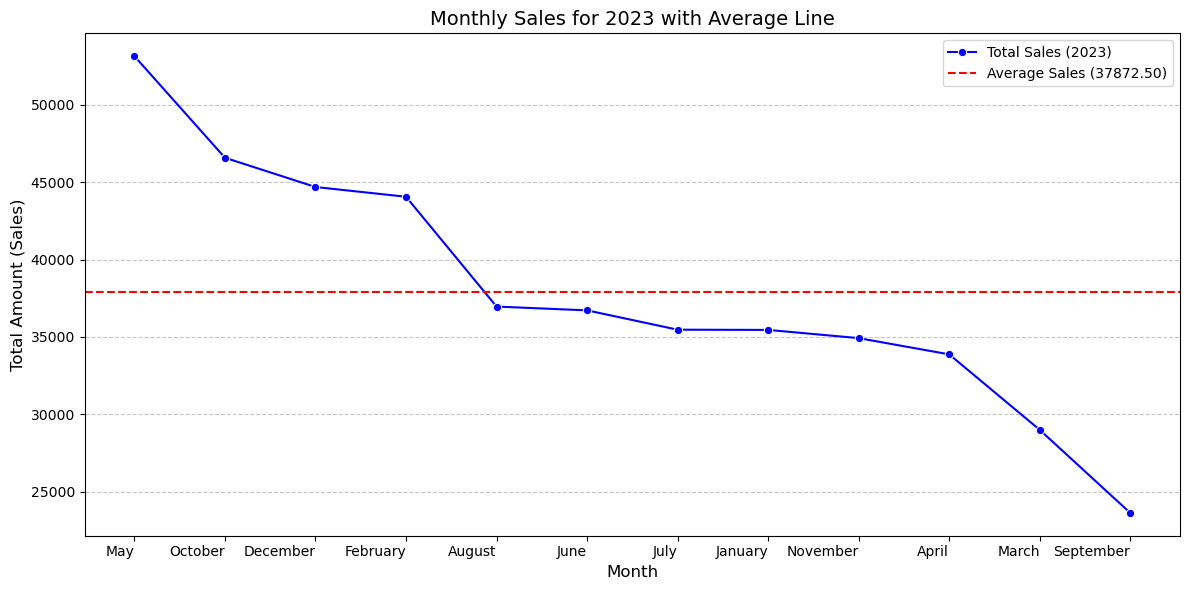

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Filter the data for the year 2023
retail_data_2023 = retail_data_monthly_sales[retail_data_monthly_sales['year'] == 2023].copy()

# Replace month numbers with month names
retail_data_2023['Month Name'] = retail_data_2023['month'].apply(lambda x: calendar.month_name[x])

# Calculate the average total sales
average_sales = retail_data_2023['Total Amount'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month Name', y='Total Amount',
    data=retail_data_2023,
    marker='o', color='blue', label='Total Sales (2023)'
)

# Add the average line
plt.axhline(y=average_sales, color='red', linestyle='--', label=f'Average Sales ({average_sales:.2f})')

# Customize labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Amount (Sales)", fontsize=12)
plt.title("Monthly Sales for 2023 with Average Line", fontsize=14)
plt.xticks(rotation=360, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [19]:
# Feature (X) and target (y)
X = retail_data_2023[['year', 'month']]  # You can add more features like 'day_of_week', 'holiday', etc.
y = retail_data_2023['Total Amount']


In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)